In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
import warnings; warnings.simplefilter('ignore')

In [35]:
wikidata = pd.read_csv('wikidata.csv')
print ("Wikidata info\n")
print (wikidata.info())
print (wikidata.head(10))

Wikidata info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6083 entries, 0 to 6082
Data columns (total 6 columns):
death_manner    6083 non-null object
gender          6083 non-null object
occupation      6083 non-null object
religion        6083 non-null object
country         6083 non-null object
language        6083 non-null object
dtypes: object(6)
memory usage: 285.2+ KB
None
         death_manner  gender  occupation         religion      country  \
0  capital punishment    male     student  Catholic Church  Switzerland   
1  capital punishment    male      lawyer            Islam     Pakistan   
2  capital punishment    male      lawyer       Shia Islam     Pakistan   
3  capital punishment    male  politician            Islam     Pakistan   
4  capital punishment    male  politician       Shia Islam     Pakistan   
5  capital punishment    male    diplomat            Islam     Pakistan   
6  capital punishment    male    diplomat       Shia Islam     Pakistan   
7  capital

In [36]:
data_raw = wikidata
features_raw = data_raw.drop('death_manner', axis=1)
label_raw = wikidata['death_manner']
print (features_raw.head(10))

   gender  occupation         religion      country  language
0    male     student  Catholic Church  Switzerland   French 
1    male      lawyer            Islam     Pakistan  English 
2    male      lawyer       Shia Islam     Pakistan  English 
3    male  politician            Islam     Pakistan  English 
4    male  politician       Shia Islam     Pakistan  English 
5    male    diplomat            Islam     Pakistan  English 
6    male    diplomat       Shia Islam     Pakistan  English 
7  female  politician      Catholicism     Scotland   French 
8  female  politician      Catholicism     Scotland  English 
9  female  politician      Catholicism     Scotland    Scots 


In [37]:
deaths = label_raw.value_counts()
df = pd.DataFrame(deaths)
print (df)

                                         death_manner
natural causes                                   4353
homicide                                          657
suicide                                           251
accident                                          219
capital punishment                                190
attack                                             70
unnatural death                                    56
heart failure                                      42
falling                                            32
myocardial infarction                              24
cardiac arrest                                     24
plague                                             21
cerebral hemorrhage                                19
illness                                            15
Islamism                                           12
Pancreatic cancer                                   9
Cerebral hypoxia                                    9
duel                        

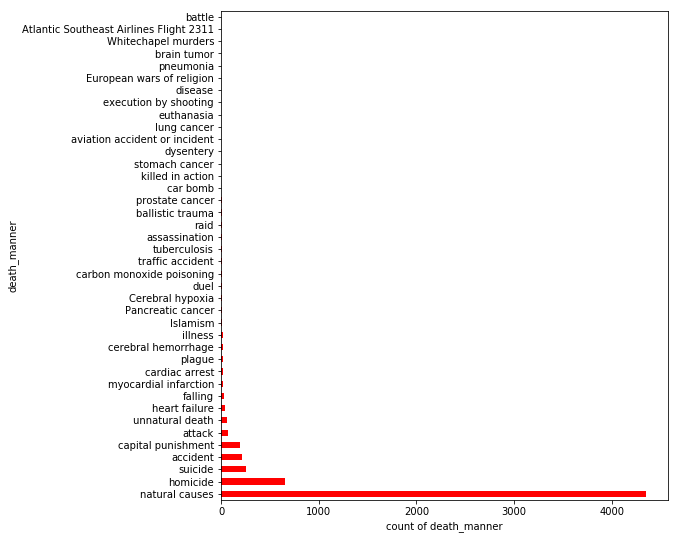

In [38]:
fig = deaths.plot(kind='barh', color='red', figsize=(8, 9))
fig.yaxis.set_label_text('death_manner')
fig.xaxis.set_label_text('count of death_manner')
fig.tick_params(labelsize=10)
plt.show()

In [39]:
group1 = data_raw.groupby(['death_manner', 'gender'])
group1 = group1.size()
print (group1)
table = pd.crosstab(index=data_raw['death_manner'], columns=data_raw['gender'])

death_manner                             gender
Atlantic Southeast Airlines Flight 2311  male         1
Cerebral hypoxia                         female       9
European wars of religion                male         2
Islamism                                 male        12
Pancreatic cancer                        male         9
Whitechapel murders                      female       1
accident                                 female      37
                                         male       182
assassination                            male         6
attack                                   male        70
aviation accident or incident            male         2
ballistic trauma                         male         5
battle                                   male         1
brain tumor                              male         1
capital punishment                       female      13
                                         male       177
car bomb                                 male         4


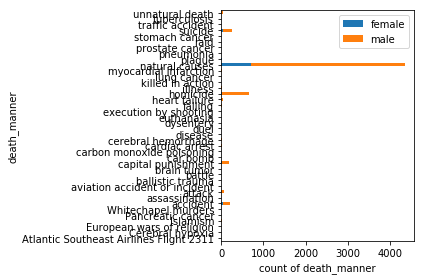

In [40]:
fig1 = table.plot(kind='barh', stacked=True)
fig1.xaxis.set_label_text('count of death_manner')
fig1.tick_params(labelsize=10)
plt.legend()
plt.tight_layout()
plt.show()

In [41]:
group2 = data_raw.groupby(['death_manner', 'country'])
group2 = group2.size()

group3 = data_raw.groupby(['death_manner', 'occupation'])
group3 = group3.size()

group4 = data_raw.groupby(['death_manner', 'religion'])
group4 = group4.size()

In [42]:
features = pd.get_dummies(features_raw, columns=['gender','country', 'occupation', 'religion', 'language'])
label = pd.get_dummies(label_raw)
print (features.shape, label.shape)

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=.2, random_state=5)
print ('Training set has {} samples.\nTesting set has {} samples.'.format((X_train.shape[0]), X_test.shape[0]))

(6083, 800) (6083, 40)
Training set has 4866 samples.
Testing set has 1217 samples.


In [43]:
#SVM Classification for wikidata
from sklearn.metrics import accuracy_score, precision_score, f1_score, mean_squared_error, precision_recall_fscore_support
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier

y_pred_svm = OneVsRestClassifier(SVC(kernel='linear', random_state=5)).fit(X_train, y_train).predict(X_test)
print ("The accuracy of SVC is {}".format(accuracy_score(y_test, y_pred_svm)))
print ("The f1_score of SVC is {}".format(f1_score(y_test, y_pred_svm, average='micro')))
print ("The mean_squared_error of SVC is {}\n".format(mean_squared_error(y_test, y_pred_svm)))

The accuracy of SVC is 0.7345932621199671
The f1_score of SVC is 0.7912663755458516
The mean_squared_error of SVC is 0.00981922760887428



In [44]:
#MLP Classification for wikidata
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=5)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)
print ("The accuracy of MLP is {}".format(accuracy_score(y_test, y_pred_mlp)))
print ("The f1_score of MLP is {}".format(f1_score(y_test, y_pred_mlp, average='micro')))
print ("The mean_squared_error of MLP is {}\n".format(mean_squared_error(y_test, y_pred_mlp)))

The accuracy of MLP is 0.780608052588332
The f1_score of MLP is 0.8172588832487309
The mean_squared_error of MLP is 0.008874281018898932



In [45]:
#Random Forest Classiifcation for wikidata
from sklearn.ensemble import RandomForestClassifier

random = RandomForestClassifier(random_state=5)
random.fit(X_train, y_train)
y_pred_random = random.predict(X_test)
print ("The accuracy of Random Forest is {}".format(accuracy_score(y_test, y_pred_random)))
print ("The f1_score of Random Forest is {}".format(f1_score(y_test, y_pred_random, average='micro')))
print ("The mean_squared_error of Random Forest is {}\n".format(mean_squared_error(y_test, y_pred_random)))

The accuracy of Random Forest is 0.7666392769104355
The f1_score of Random Forest is 0.7893401015228426
The mean_squared_error of Random Forest is 0.010230073952341826



In [46]:
#Decision Tree Classiifcation for wikidata
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=5)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
print ("The accuracy of Decision Tree is {}".format(accuracy_score(y_test, y_pred_tree)))
print ("The f1_score of Decision Tree is {}".format(f1_score(y_test, y_pred_tree, average='micro')))
print ("The mean_squared_error of Decision Tree is {}\n".format(mean_squared_error(y_test, y_pred_tree)))

The accuracy of Decision Tree is 0.7740345110928513
The f1_score of Decision Tree is 0.7906000839278221
The mean_squared_error of Decision Tree is 0.010250616269515202



In [47]:
#Naive Bayes Classiifcation for wikidata
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier

y_pred_NB = OneVsRestClassifier(GaussianNB()).fit(X_train, y_train).predict(X_test)
print ("The accuracy of Naive Bayes is {}".format(accuracy_score(y_test, y_pred_NB)))
print ("The f1_score of Naive Bayes is {}".format(f1_score(y_test, y_pred_NB, average='micro')))
print ("The mean_squared_error of Naive Bayes is {}\n".format(mean_squared_error(y_test, y_pred_NB)))



The accuracy of Naive Bayes is 0.3705834018077239
The f1_score of Naive Bayes is 0.3545840922890103
The mean_squared_error of Naive Bayes is 0.04367296631059984



# Conclusion
This analysis shows that MLP performs better than all other models for this dataset and achieved
highest accuracy of 78.06% while mean absolute error is lowest as 0.0088. The second-best model
is Decision Tree which attained accuracy of 77.40%.